# Etude sur Alien vs Predator - épisode 3

Développer un programme de vision par ordinateur capable de différencier avec précision un Alien d'un Predator.

Contexte du projet

L'épisode 2 a mis en évidence que la technique de "data augmentation" permet de diminuer de manière très efficace le surapprentissage mais n'améliore que très peu (dans notre exemple !) la performance de différenciation d'une image d'un alien d'une image d'un prédator. Dans l'épisode 3, nous allons utiliser la technique dite de "transfer learning" et plus particulièrement d'extractions de caractéristiques ("features extraction") pour améliorer les performances du programme de vision par ordinateur.

エピソード2では、データ補強技術は過学習を減らすのに非常に有効であるが、エイリアン画像と捕食者画像の区別の性能は（我々の例では！）わずかに向上するのみであることが示された。第3話では、コンピュータビジョンのプログラムの性能を向上させるために、転移学習、より具体的には特徴抽出を利用します。


La procédure à suivre est la suivante :

    Charger le modèle VGG-16 (mais qu'est-ce donc que ce VGG-16 ?) ;
    Extraire les caractéristiques des images des jeux d'apprentissage, de validation et de test via VGG-16 ;
    Entrainer un perceptron multi-couches avec le code Keras/TensorFlow suivant pour prédire à partir des caractéristiques extraites par VGG-16 la sortie (Alien ou Prédator) :

model = models.Sequential()

model.add(layers.Dense(units=256, activation='relu', input_dim=4 * 4 * 512))

model.add(layers.Dense(units=1, activation='sigmoid'))

    Conclure.

    VGG-16モデルをロードします（VGG-16とは一体何でしょうか？）
    VGG-16により、トレーニングセット、検証セット、テストセットから画像特徴を抽出する。
    VGG-16で抽出した特徴量から出力（エイリアンかプレデターか）を予測するために、以下のKeras/TensorFlowコードで多層パーセプトロンを学習させます。

model = models.Sequential()

model.add(layers.Dense(units=256, activation='relu', input_dim=4 * 4 * 512))

model.add(layers.Dense(units=1, activation=sigmoid'))

    結論を出す。




Tâches optionnelles, pour les plus courageuses et les plus courageux d'entre vous :

    Tester d'autres modèles que VGG-16 pour effectuer l'étape de "features extraction" ;
    Tester d'autres modèles de Machine Learning (par exemple SVM) pour effectuer l'étape de supervision.

オプションのタスク、勇敢なあなたへ。

    VGG-16以外のモデルで「特徴抽出」ステップをテストする。
    他の機械学習モデル（例：SVM）をテストして、監督ステップを実行する。



### 1 - import librarys

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

### 2 - set option pour l'affichage

In [3]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - charger des images

In [31]:
feature_train = np.load('feature_train.npy')
feature_val = np.load('feature_val.npy')

y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')


In [32]:
print(feature_train)

[[ 0.         15.6525507   0.         ...  0.          0.
   5.97944736]
 [ 0.          5.44161177  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


### Entrainer un perceptron multi-couches avec le code Keras suivant pour prédire à partir des caractéristiques extraites par VGG-16 la sortie (Alien ou Prédator)

In [15]:
model = Sequential()
model.add(layers.Dense(units=256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(feature_train, 
          y_train,
          epochs = 100,
          validation_data = (feature_val, 
                             y_val), 
          steps_per_epoch=1,#for generator use only, si x_train est créé par numpy, utilise batch_size
          validation_steps=1
         )

Epoch 1/100
1/1 [==============================] - 1s 547ms/step - loss: 5.3974 - accuracy: 0.4534 - val_loss: 37.4771 - val_accuracy: 0.5050
Epoch 2/100
1/1 [==============================] - 0s 106ms/step - loss: 31.8426 - accuracy: 0.5020 - val_loss: 2.8869 - val_accuracy: 0.8300
Epoch 3/100
1/1 [==============================] - 0s 97ms/step - loss: 0.8414 - accuracy: 0.9291 - val_loss: 5.5119 - val_accuracy: 0.7750
Epoch 4/100
1/1 [==============================] - 0s 98ms/step - loss: 2.6742 - accuracy: 0.8725 - val_loss: 10.8170 - val_accuracy: 0.6800
Epoch 5/100
1/1 [==============================] - 0s 99ms/step - loss: 5.4606 - accuracy: 0.7692 - val_loss: 7.1159 - val_accuracy: 0.7300
Epoch 6/100
1/1 [==============================] - 0s 105ms/step - loss: 2.6127 - accuracy: 0.8563 - val_loss: 3.1666 - val_accuracy: 0.8400
Epoch 7/100
1/1 [==============================] - 0s 106ms/step - loss: 0.8485 - accuracy: 0.9555 - val_loss: 1.4076 - val_accuracy: 0.8900
Epoch 8/100
1

Epoch 58/100
1/1 [==============================] - 0s 96ms/step - loss: 1.3963e-05 - accuracy: 1.0000 - val_loss: 0.8715 - val_accuracy: 0.8950
Epoch 59/100
1/1 [==============================] - 0s 97ms/step - loss: 1.3524e-05 - accuracy: 1.0000 - val_loss: 0.8702 - val_accuracy: 0.8950
Epoch 60/100
1/1 [==============================] - 0s 94ms/step - loss: 1.3117e-05 - accuracy: 1.0000 - val_loss: 0.8691 - val_accuracy: 0.8950
Epoch 61/100
1/1 [==============================] - 0s 93ms/step - loss: 1.2737e-05 - accuracy: 1.0000 - val_loss: 0.8680 - val_accuracy: 0.8950
Epoch 62/100
1/1 [==============================] - 0s 90ms/step - loss: 1.2382e-05 - accuracy: 1.0000 - val_loss: 0.8670 - val_accuracy: 0.8950
Epoch 63/100
1/1 [==============================] - 0s 92ms/step - loss: 1.2050e-05 - accuracy: 1.0000 - val_loss: 0.8661 - val_accuracy: 0.8950
Epoch 64/100
1/1 [==============================] - 0s 98ms/step - loss: 1.1739e-05 - accuracy: 1.0000 - val_loss: 0.8652 - val_ac

In [1]:
#history.history['loss']

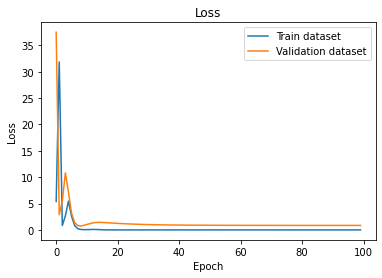

In [20]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train dataset')
plt.plot(history.history['val_loss'], label='Validation dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

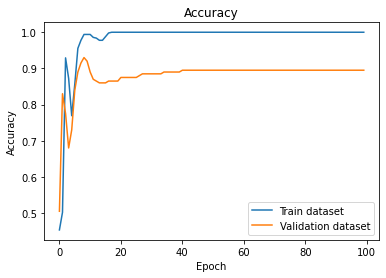

In [21]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train dataset')
plt.plot(history.history['val_accuracy'], label='Validation dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

confusion matrix

In [22]:
y_train_pred = model.predict(feature_train)
y_train_pred  = y_train_pred > 0.5

cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[247,   0],
       [  0, 247]], dtype=int64)

In [23]:
y_val_pred = model.predict(feature_val)
y_val_pred  = y_val_pred > 0.5

cm_val = confusion_matrix(y_val, y_val_pred)
cm_val

array([[81, 19],
       [ 2, 98]], dtype=int64)

affichage classification report

In [24]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       1.00      1.00      1.00       247
  Predator 1       1.00      1.00      1.00       247

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



In [25]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_val, y_val_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.98      0.81      0.89       100
  Predator 1       0.84      0.98      0.90       100

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.89       200
weighted avg       0.91      0.90      0.89       200



save the model

In [28]:
#model.save('model_ep3_best.h5')#fini h5

### save for tensorflow model : model.save()

In [30]:
model.save('best_model_ep3')

INFO:tensorflow:Assets written to: best_model_ep3\assets


preprocess_fucntion : 各入力に適用される関数。この関数は他の変更が行われる前に実行される。この関数は３次元のNumpyテンソルを引数にとり、同じshapeのテンソルを出力するように定義する必要あり。

各モデルにpreprocess_inputという便利な関数があります:モデルに適した値に正規化 ImageDataGenerator( preprocessing_function=preprocess_input, )

https://qiita.com/tatsuya11bbs/items/f2008ba8c6f127ce7524 from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

https://github.com/tkeldenich/Computer_Vision_CNN_DataAugmentation/blob/main/Computer_Vision_CNN_DataAugmentation.ipynb